<a href="https://colab.research.google.com/github/SRAVAN-BONTHADA/Python-Basic-to-Advanced/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

### Linear regression predicts the relationship between two variables by assuming a linear connection between the independent and dependent variables.
>>**It seeks the optimal line that minimizes the sum of squared differences between predicted(The value needs to know for future expectation) and actual values(know value in our dataset). **![linear_regression_scheme.png](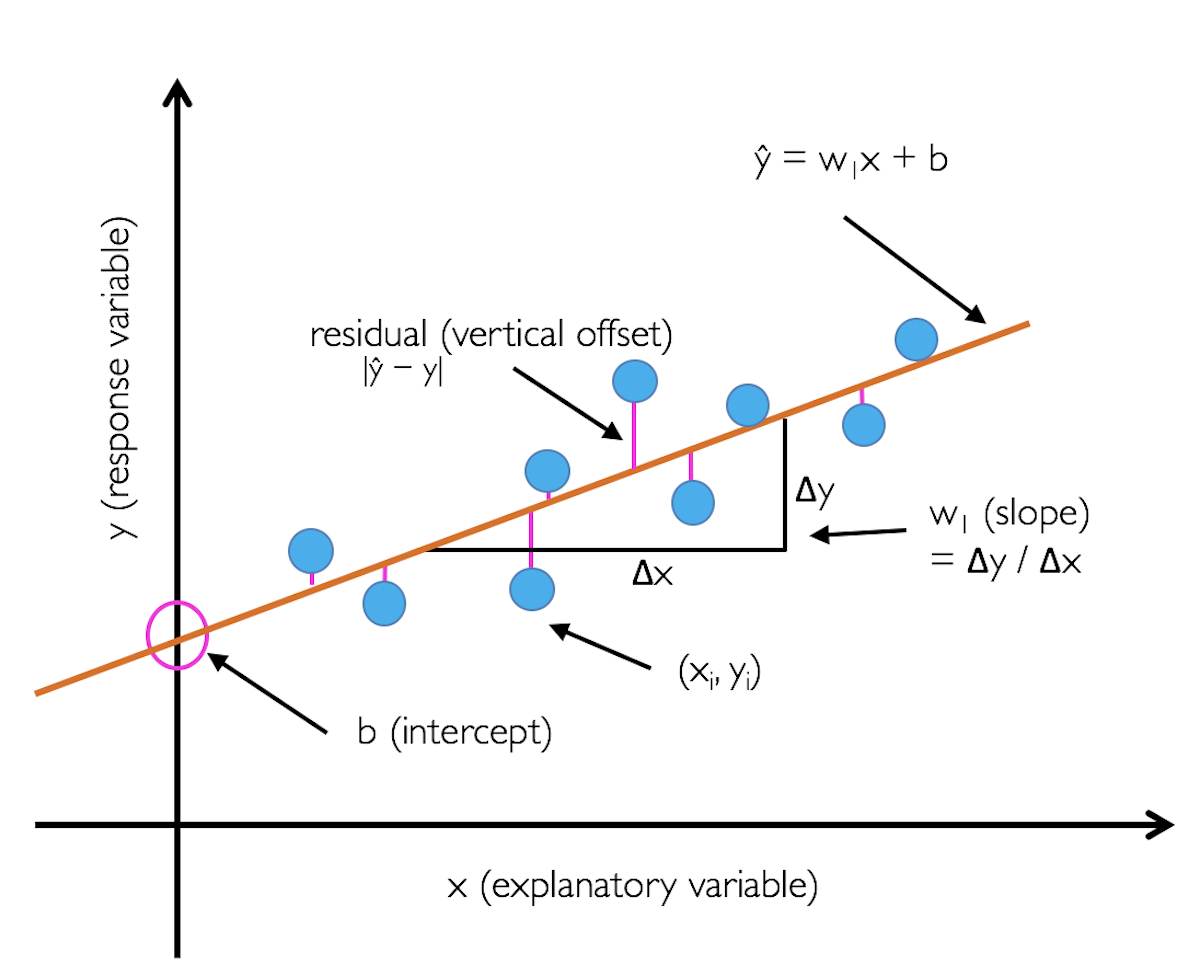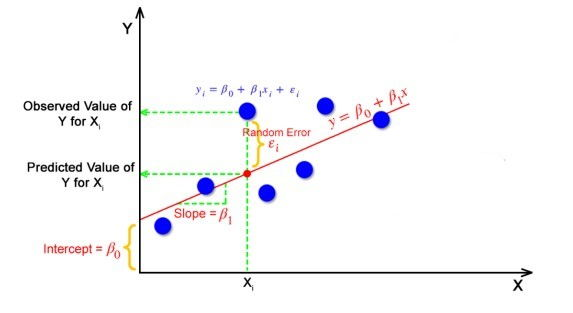)

#### The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables.
-The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero.

To calculate best-fit line linear regression uses a traditional slope-intercept form which is given below,

Yi = β0 + β1Xi

where Yi = Dependent variable,  β0 = constant/Intercept, β1 = Slope/Intercept, Xi = Independent variable.

This algorithm explains the linear relationship between the dependent(output) variable y and the independent(predictor) variable X using a straight line  Y= B0 + B1 X.

The goal of the linear regression algorithm is to get the best values for B0 and B1 to find the best fit line.


The best fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.

Random Error(Residuals)
In regression, the difference between the observed value of the dependent variable(yi) and the predicted value(predicted) is called the residuals.

εi =  ypredicted –   yi

where ypredicted =   B0 + B1 Xi

Cost Function for Linear Regression
The cost function helps to work out the optimal values for B0 and B1, which provides the best fit line for the data points.

In Linear Regression, generally Mean Squared Error (MSE) cost function is used, which is the average of squared error that occurred between the ypredicted and yi.

We calculate MSE using simple linear equation y=mx+b:

MSE = 1/n*summation(y_acutual- y_predicted)

*** MSE = 1/n * summation(y_acutual(y) -y_predicted(b1*x1 + b2*x2 +b0)) ***

#### Gradient Descent for Linear Regression
Gradient Descent is one of the optimization algorithms that optimize the cost function(objective function) to reach the optimal minimal solution. To find the optimum solution we need to reduce the cost function(MSE) for all data points. This is done by updating the values of B0 and B1 iteratively until we get an optimal solution.

A regression model optimizes the gradient descent algorithm to update the coefficients of the line by reducing the cost function by randomly selecting coefficient values and then iteratively updating the values to reach the minimum cost function.

To update B0 and B1, we take gradients from the cost function. To find these gradients, we take partial derivatives for B0 and B1.

We need to minimize the cost function J. One of the ways to achieve this is to apply the batch gradient descent algorithm.

The partial derivates are the gradients, and they are used to update the values of B0 and B1. Alpha is the learning rate.

## Evaluation Metrics for Linear Regression

The strength of any linear regression model can be assessed using various evaluation metrics. These evaluation metrics usually provide a measure of how well the observed outputs are being generated by the model.

The most used metrics are,

* Coefficient of Determination or R-Squared (R2)
* Root Mean Squared Error (RSME) and Residual Standard Error (RSE)

Coefficient of Determination or R-Squared (R2)
R-Squared is a number that explains the amount of variation that is explained/captured by the developed model. It always ranges between 0 & 1 . Overall, the higher the value of R-squared, the better the model fits the data.

Mathematically it can be represented as,

                                           R2 = 1 – ( RSS/TSS )

Residual sum of Squares (RSS) is defined as the sum of squares of the residual for each data point in the plot/data. It is the measure of the difference between the expected and the actual observed output.
Residual Sum of Squares | Linear regression
Total Sum of Squares (TSS) is defined as the sum of errors of the data points from the mean of the response variable. Mathematically TSS is,
Total Sum of Squares
where y hat is the mean of the sample data points.


The Residual Sum of Squares (RSS) is a fundamental concept in regression analysis, including linear regression. It measures the total squared difference between the actual observed values of the target variable and the values predicted by the regression model.

Mathematically, the RSS is defined as: **summation(y_acutual - y_predicted) square of 2)**

Total Sum of Squares (TSS) is another important concept in regression analysis, particularly when assessing the goodness-of-fit of a model. TSS measures the total variance in the dependent variable (target variable) without considering the explanatory variables (features).

Mathematically, TSS is defined as: **summation(y_acutual - y_mean_of_predicted)square of 2)**

Root Mean Squared Error
The Root Mean Squared Error is the square root of the variance of the residuals. It specifies the absolute fit of the model to the data i.e. how close the observed data points are to the predicted values. Mathematically it can be represented as,

Root Mean Squared Error
To make this estimate unbiased, one has to divide the sum of the squared residuals by the degrees of freedom rather than the total number of data points in the model. This term is then called the Residual Standard Error(RSE). Mathematically it can be represented as,

Residual Standard Error
R-squared is a better measure than RSME. Because the value of Root Mean Squared Error depends on the units of the variables (i.e. it is not a normalized measure), it can change with the change in the unit of the variables.

#### Formula of RMSE : (1/n) * summation(y_acutual - y_predicted)**2

To make this estimate unbiased, one has to divide the sum of the squared residuals by the degrees of freedom rather than the total number of data points in the model. This term is then called the Residual Standard Error(RSE). Mathematically it can be represented as,



#### Formula of Residual Standard Error(RSE) : (1/n-2) * summation(y_acutual - y_predicted)**2

Considerations of Multiple Linear Regression
All the four assumptions made for Simple Linear Regression still hold true for Multiple Linear Regression along with a few new additional assumptions.

Overfitting: When more and more variables are added to a model, the model may become far too complex and usually ends up memorizing all the data points in the training set. This phenomenon is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.
Multicollinearity: It is the phenomenon where a model with several independent variables, may have some variables interrelated.
Feature Selection: With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model.

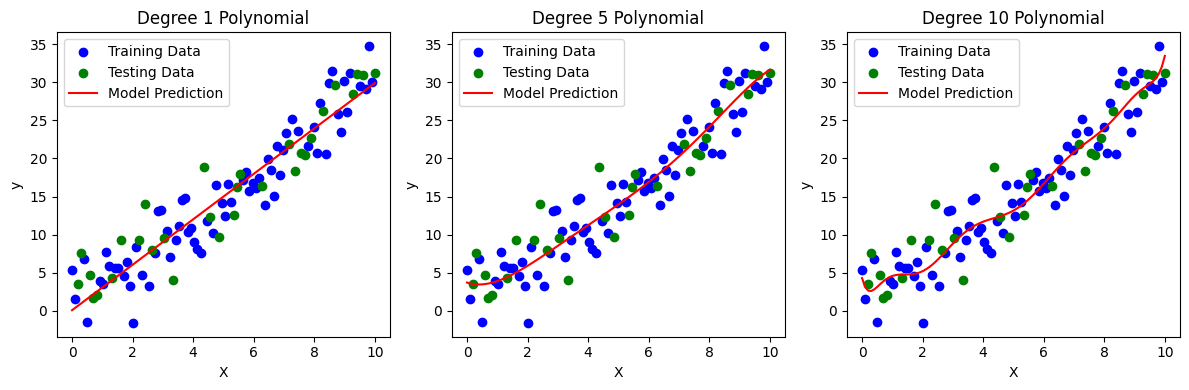

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 3 * X + np.random.normal(0, 3, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define polynomial degrees to try
degrees = [1, 5, 10]

plt.figure(figsize=(12, 4))
for i, degree in enumerate(degrees, 1):
    # Fit polynomial regression model
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly_features.transform(X_test.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    # Plot training and testing data
    plt.subplot(1, len(degrees), i)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Testing Data')

    # Plot model predictions
    x_values = np.linspace(0, 10, 100)
    y_values = model.predict(poly_features.transform(x_values.reshape(-1, 1)))
    plt.plot(x_values, y_values, color='red', label='Model Prediction')

    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


### 1.My openion on Bias means Low variance of residual errors
### 2. High Bias means train data points are not showing pattrens to the model to learn
###  2.Varaiance means because of unsoffient data will cause high variance and high variance model get overfitted

### 3.Second reason of overfitted data spred is clear in train dataset but while testing has not clear spred of data points

In [3]:
from sklearn.model_selection import cross_val_score

# Define a list of polynomial degrees to try
degrees = [1, 2, 3, 4, 5]

# Initialize lists to store mean cross-validation scores
mean_cv_scores = []

# Iterate over each degree and perform cross-validation
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)
    mean_cv_scores.append(mean_cv_score)

# Find the degree with the lowest mean cross-validation score
best_degree = degrees[np.argmin(mean_cv_scores)]
print(f'Best polynomial degree: {best_degree}')


Best polynomial degree: 5


>> ***Optimal Polynomial will maintain the trade-off 'Variance - Bias'***

# New Data Genarated by Code

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Create a synthetic dataset with multiple ordinal columns
np.random.seed(0)

# Number of samples
num_samples = 1000

# Generate ordinal features
ordinal_features = pd.DataFrame({
    'experience_level': np.random.choice(['Junior', 'Mid-level', 'Senior'], num_samples),
    'education_level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], num_samples),
    'skill_level': np.random.choice(['Beginner', 'Intermediate', 'Advanced'], num_samples)
})

# Generate numerical features
numerical_features = pd.DataFrame({
    'age': np.random.randint(18, 80, num_samples),
    'salary': np.random.randint(20000, 100000, num_samples)
})

# Generate categorical features
categorical_features = pd.DataFrame({
    'employment_status': np.random.choice(['Employed', 'Unemployed'], num_samples),
    'gender': np.random.choice(['Male', 'Female'], num_samples)
})

# Combine all features into a single dataframe
mixed_features = pd.concat([ordinal_features, numerical_features, categorical_features], axis=1)

# Introduce NaN values in some columns
mixed_features.loc[np.random.choice(mixed_features.index, size=int(0.1*num_samples), replace=False), 'salary'] = np.nan
mixed_features.loc[np.random.choice(mixed_features.index, size=int(0.05*num_samples), replace=False), 'education_level'] = np.nan

# Display the first few rows of the dataset
print("Original Dataset:")
print(mixed_features.head())


Original Dataset:
  experience_level education_level   skill_level  age   salary  \
0           Junior        Bachelor      Advanced   59  48719.0   
1        Mid-level        Bachelor  Intermediate   21  22492.0   
2           Junior        Bachelor      Advanced   52  26463.0   
3        Mid-level        Bachelor      Advanced   59  92315.0   
4        Mid-level     High School      Advanced   31      NaN   

  employment_status  gender  
0          Employed    Male  
1          Employed    Male  
2          Employed  Female  
3        Unemployed    Male  
4        Unemployed  Female  


In [46]:
df = mixed_features

In [47]:
df.fillna(df.median(),inplace = True)

<ipython-input-47-d41b391fa431>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace = True)


In [48]:
df.isnull().sum()

experience_level      0
education_level      50
skill_level           0
age                   0
salary                0
employment_status     0
gender                0
dtype: int64

In [49]:
df['education_level'].fillna(df['education_level'].mode()[0],inplace=True)

In [50]:
df.isnull().sum()

experience_level     0
education_level      0
skill_level          0
age                  0
salary               0
employment_status    0
gender               0
dtype: int64

In [12]:
cat_df = df.select_dtypes(include='object')
cat_df

,education,employment_status,gender
0,High School,Employed,Male
1,PhD,Employed,Male
2,PhD,Employed,Female
3,PhD,Unemployed,Male
4,High School,Unemployed,Male
...,...,...,...
995,High School,Employed,Female
996,PhD,Employed,Male
997,PhD,Unemployed,Male
998,Master,Employed,Female


In [16]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [51]:
df

,experience_level,education_level,skill_level,age,salary,employment_status,gender
0,Junior,Bachelor,Advanced,59,48719.0,Employed,Male
1,Mid-level,Bachelor,Intermediate,21,22492.0,Employed,Male
2,Junior,Bachelor,Advanced,52,26463.0,Employed,Female
3,Mid-level,Bachelor,Advanced,59,92315.0,Unemployed,Male
4,Mid-level,High School,Advanced,31,60057.5,Unemployed,Female
...,...,...,...,...,...,...,...
995,Senior,Master,Advanced,58,74413.0,Employed,Female
996,Mid-level,High School,Beginner,28,85899.0,Unemployed,Female
997,Junior,PhD,Intermediate,25,34588.0,Unemployed,Female
998,Senior,Bachelor,Beginner,47,50280.0,Unemployed,Female


In [ ]:
# Preprocessing steps
# Handling NaN values
mixed_features.fillna(mixed_features.median(), inplace=True)  # Filling NaN values with median (for numerical columns)

# One-hot encoding for categorical columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(mixed_features[['employment_status', 'gender']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(['employment_status', 'gender']), index=mixed_features.index)

# Ordinal encoding for ordinal columns
ordinal_encoder = OrdinalEncoder(categories=[['Junior', 'Mid-level', 'Senior'], ['High School', 'Bachelor', 'Master', 'PhD'], ['Beginner', 'Intermediate', 'Advanced']])
ordinal_encoded = ordinal_encoder.fit_transform(ordinal_features)
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_features.columns, index=ordinal_features.index)

# Combine encoded features with numerical features
processed_features = pd.concat([ordinal_encoded_df, numerical_features, one_hot_encoded_df], axis=1)

# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(processed_features.head())

In [18]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder


In [53]:
df['employment_status']

0        Employed
1        Employed
2        Employed
3      Unemployed
4      Unemployed
          ...    
995      Employed
996    Unemployed
997    Unemployed
998    Unemployed
999      Employed
Name: employment_status, Length: 1000, dtype: object

In [63]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
onehot = OneHotEncoder(sparse=False)

# Fit and transform the selected columns
onehot_encoded = onehot.fit_transform(df[['employment_status', 'gender']])

# Create a DataFrame with the encoded values
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names_out(['employment_status', 'gender']), index=df.index)

# Display the first few rows of the encoded DataFrame
onehot_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,employment_status_Employed,employment_status_Unemployed,gender_Female,gender_Male
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0


In [64]:
df

,experience_level,education_level,skill_level,age,salary,employment_status,gender
0,Junior,Bachelor,Advanced,59,48719.0,Employed,Male
1,Mid-level,Bachelor,Intermediate,21,22492.0,Employed,Male
2,Junior,Bachelor,Advanced,52,26463.0,Employed,Female
3,Mid-level,Bachelor,Advanced,59,92315.0,Unemployed,Male
4,Mid-level,High School,Advanced,31,60057.5,Unemployed,Female
...,...,...,...,...,...,...,...
995,Senior,Master,Advanced,58,74413.0,Employed,Female
996,Mid-level,High School,Beginner,28,85899.0,Unemployed,Female
997,Junior,PhD,Intermediate,25,34588.0,Unemployed,Female
998,Senior,Bachelor,Beginner,47,50280.0,Unemployed,Female


In [70]:
ordinal = OrdinalEncoder(categories = [list(df['experience_level'].unique()),list(df['education_level'].unique()),list(df['skill_level'].unique())])

ordinal_features = ordinal.fit_transform(df[['experience_level','education_level','skill_level']])

ordinal_df = pd.DataFrame(ordinal_features,columns = ordinal.get_feature_names_out(['experience_level','education_level','skill_level']),index = df.index)

In [72]:
ordinal_df.head()

,experience_level,education_level,skill_level
0,0.0,0.0,0.0
1,1.0,0.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0


In [74]:
ordinal_df['experience_level'].unique()

array([0., 1., 2.])

In [75]:
numerical_df = df.select_dtypes(include='number')
numerical_df.head()

,age,salary
0,59,48719.0
1,21,22492.0
2,52,26463.0
3,59,92315.0
4,31,60057.5


In [77]:
preproceed_df = pd.concat([onehot_df,ordinal_df,numerical_df],axis = 1)

In [79]:
X = preproceed_df.drop('salary',axis = 1)
y = df['salary']

In [85]:
len(y),len(X)

(1000, 1000)

In [87]:
y

0      48719.0
1      22492.0
2      26463.0
3      92315.0
4      60057.5
        ...   
995    74413.0
996    85899.0
997    34588.0
998    50280.0
999    53843.0
Name: salary, Length: 1000, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [89]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y ,test_size =0.2,random_state = 43)

In [90]:
print(X_train.shape,y_train.shape)

(800, 8) (800,)


In [91]:
from inspect import modulesbyfile
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [92]:
predicted = model.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

mse = np.sqrt(mean_squared_error(y_test,predicted))
print(mse)

22350.55587539309


In [97]:
from sklearn.metrics import mean_absolute_error

# Assuming predictions contains the predicted values and y_test contains the true values
mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 18620.42600552307


In [98]:
print(y_test[0:5],predicted[0:5])

858    86204.0
986    95912.0
183    64746.0
502    60057.5
710    40462.0
Name: salary, dtype: float64 [59892.89584655 57553.57623642 58521.7368873  62097.35651306
 59961.63246212]


In [99]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [100]:
# Assuming X_train and y_train are your training data
model = LinearRegressionGD()
model.fit(X_train, y_train)

# Assuming X_test is your test data
predictions = model.predict(X_test)


<ipython-input-99-d2a1fe8c4493>:24: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * dw


In [102]:
print(y_test[0:5],predictions[0:5])

858    86204.0
986    95912.0
183    64746.0
502    60057.5
710    40462.0
Name: salary, dtype: float64 [nan nan nan nan nan]


In machine learning, "L1" and "L2" refer to regularization techniques used to prevent overfitting and improve the generalization of models.

1. **L1 Regularization (Lasso Regression)**:
   - L1 regularization adds a penalty term to the cost function proportional to the absolute value of the coefficients of the features.
   - It encourages sparsity in the feature space, meaning it tends to force irrelevant or less important features' coefficients to zero.
   - It can be represented as:
     ```
     Loss function = (original loss function) + λ * Σ |θi|
     ```
     where θi represents the coefficients and λ controls the strength of regularization.

2. **L2 Regularization (Ridge Regression)**:
   - L2 regularization adds a penalty term to the cost function proportional to the square of the coefficients of the features.
   - It penalizes large coefficients but does not set them to zero, promoting the distribution of weights across all features.
   - It can be represented as:
     ```
     Loss function = (original loss function) + λ * Σ (θi^2)
     ```
     where θi represents the coefficients and λ controls the strength of regularization.

Both L1 and L2 regularization techniques help in preventing overfitting by penalizing overly complex models. The choice between L1 and L2 regularization often depends on the specific problem and the desired characteristics of the model. L1 regularization tends to produce sparse models (with many coefficients being zero), which can be useful for feature selection, while L2 regularization tends to produce models with small but non-zero coefficients for all features.

Sure, let's delve into a simplified linear regression example to illustrate the concepts of L1 and L2 regularization.

Consider a simple linear regression model with one feature:

```
y = θ0 + θ1 * x + ε
```

Where:
- y is the target variable.
- x is the feature.
- θ0 and θ1 are the coefficients (parameters) of the model.
- ε represents the error term.

Let's assume we have a dataset with multiple observations of (x, y) pairs.

### Cost Function (Mean Squared Error):
The cost function for linear regression is often the mean squared error (MSE), defined as:

```
MSE = (1/n) * Σ (y - ŷ)^2
```

Where:
- n is the number of observations.
- ŷ is the predicted value.

### L1 Regularization (Lasso Regression):
With L1 regularization, the cost function becomes:

```
Cost = MSE + λ * (|θ0| + |θ1|)
```

Where λ is the regularization parameter controlling the strength of regularization.

### L2 Regularization (Ridge Regression):
With L2 regularization, the cost function becomes:

```
Cost = MSE + λ * (θ0^2 + θ1^2)
```

### Example:
Let's say we have a dataset with two observations:

```
(x1, y1) = (1, 2)
(x2, y2) = (2, 3)
```

For simplicity, let's assume the initial predictions are:

```
ŷ1 = 2
ŷ2 = 3
```

And the initial coefficients are:
- θ0 = 1
- θ1 = 1

Now, let's calculate the MSE and then add regularization terms:

1. **Without Regularization**:
   ```
   MSE = (1/2) * [(2-2)^2 + (3-3)^2] = 0
   ```

2. **With L1 Regularization**:
   ```
   Cost_L1 = 0 + λ * (|1| + |1|)
   ```

3. **With L2 Regularization**:
   ```
   Cost_L2 = 0 + λ * (1^2 + 1^2)
   ```

### Interpretation:
- L1 regularization tends to produce sparser solutions by driving some coefficients to exactly zero. In this example, if λ is large enough, it might set some coefficients to zero.
- L2 regularization tends to keep all coefficients relatively small but rarely sets them exactly to zero.

By adjusting the λ parameter, you control how much regularization is applied. Higher λ values lead to stronger regularization, potentially resulting in simpler models with less overfitting.

Let's take an example where we fit a linear regression model to a small dataset with L1 and L2 regularization.

Consider a dataset with three data points:

```
(x1, y1) = (1, 2)
(x2, y2) = (2, 3)
(x3, y3) = (3, 4)
```

We'll start by fitting a simple linear regression model:

```
y = θ0 + θ1 * x
```

Our goal is to find the values of θ0 and θ1 that minimize the mean squared error (MSE). The MSE is defined as:

```
MSE = (1/n) * Σ (y - ŷ)^2
```

where ŷ is the predicted value, and n is the number of data points.

### Without Regularization:
First, let's compute the coefficients without any regularization.

Using the formulas for linear regression coefficients:

```
θ1 = Σ((x - x_mean) * (y - y_mean)) / Σ((x - x_mean)^2)
θ0 = y_mean - θ1 * x_mean
```

We find:

```
x_mean = (1 + 2 + 3) / 3 = 2
y_mean = (2 + 3 + 4) / 3 = 3
```

```
θ1 = ((1-2)*(2-3) + (2-2)*(3-3) + (3-2)*(4-3)) / ((1-2)^2 + (2-2)^2 + (3-2)^2)
   = (-1*1 + 0*0 + 1*1) / (1 + 0 + 1)
   = 0 / 2
   = 0
```

```
θ0 = 3 - 0 * 2 = 3
```

So, without regularization, our model is:

```
y = 3
```

### With L1 Regularization (Lasso Regression):
Now, let's apply L1 regularization. The cost function with L1 regularization is:

```
Cost_L1 = MSE + λ * (|θ0| + |θ1|)
```

Let's assume λ = 0.1.

The coefficient updates for Lasso Regression can be done using subgradient descent, but in this simple example, let's manually adjust the coefficients.

```
Cost_L1 = (1/3) * Σ (y - ŷ)^2 + 0.1 * (|3| + |0|) = (1/3) * Σ (y - 3)^2 + 0.1 * 3
       = (1/3) * ((2 - 3)^2 + (3 - 3)^2 + (4 - 3)^2) + 0.1 * 3
       = (1/3) * (1 + 0 + 1) + 0.1 * 3
       = (2/3) + 0.3
       = 1.0
```

### With L2 Regularization (Ridge Regression):
For L2 regularization, the cost function is:

```
Cost_L2 = MSE + λ * (θ0^2 + θ1^2)
```

Let's assume λ = 0.1.

```
Cost_L2 = (1/3) * Σ (y - ŷ)^2 + 0.1 * (3^2 + 0^2) = (1/3) * Σ (y - 3)^2 + 0.1 * 9
       = (1/3) * ((2 - 3)^2 + (3 - 3)^2 + (4 - 3)^2) + 0.1 * 9
       = (1/3) * (1 + 0 + 1) + 0.1 * 9
       = (2/3) + 0.9
       = 1.6
```

### Conclusion:
- Without regularization, the model is simply a constant value equal to the mean of y.
- With L1 regularization, the cost increases slightly, as it tries to make coefficients smaller or zero.
- With L2 regularization, the cost increases more significantly compared to L1 regularization, as it penalizes the squared values of coefficients.

Determining the appropriate value of the regularization parameter λ (lambda) is often done through techniques like cross-validation or grid search. The process typically involves:

1. **Cross-Validation**: The dataset is split into training and validation sets. Different values of λ are tried, and the model is trained on the training set and evaluated on the validation set using a chosen performance metric (e.g., mean squared error, accuracy). This process is repeated for different values of λ, and the one that yields the best performance on the validation set is selected.

2. **Grid Search**: A set of λ values is predefined, and the model is trained and evaluated for each value of λ. The λ value that produces the best performance on the validation set is chosen.

The choice of λ can have a significant impact on the performance and generalization ability of the model. A smaller λ value will result in less regularization, potentially leading to overfitting, while a larger λ value will result in stronger regularization, potentially leading to underfitting.

In practice, it's common to try λ values on a logarithmic scale, covering a wide range of magnitudes. For example, you might try values like 0.001, 0.01, 0.1, 1, 10, etc.

It's worth noting that the optimal value of λ can vary depending on the specific dataset and the complexity of the model. Therefore, it's essential to perform cross-validation or grid search to find the most suitable value for your particular problem.

In [103]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(42)
X = np.random.rand(100, 1)  # One feature
y = 3 * X.squeeze() + np.random.randn(100)  # Linear relationship with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to search over
models = [
    ('linear', LinearRegression(), {}),  # Linear Regression
    ('polynomial', Pipeline([
        ("poly_features", PolynomialFeatures()),
        ("ridge_reg", Ridge())
    ]), {'poly_features__degree': [2, 3, 4], 'ridge_reg__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})  # Polynomial Regression with Ridge regularization
]

# Perform grid search with cross-validation for each model
best_models = {}
for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    # Print the best parameters for each model
    print(f"Best parameters for {name} model:", grid_search.best_params_)

# Evaluate the best models on the test data
mse_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"Mean squared error on test data for {name}:", mse)


Best parameters for linear model: {}
Best parameters for polynomial model: {'poly_features__degree': 3, 'ridge_reg__alpha': 1}
Mean squared error on test data for linear: 0.6536995137170021
Mean squared error on test data for polynomial: 0.6313205927304015
